In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C


In [9]:
data.isnull().sum()
#there are nan in Age,Cabin and Embarked columns..

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df=data.drop(columns=['Cabin','Name'],axis=1)
df
#dropping column Cabin

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [33]:
df['Age'].fillna(df['Age'].mean(),inplace = True)
#Placing mean value for nan in Age..

In [34]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [35]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#placing mode values for nan in embarked.

In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
ord_enc=OrdinalEncoder(categories=['male','female'],['S','C','Q'])
enc_df=ord_enc.fit.transform(df[['Sex','Embarked']])

SyntaxError: positional argument follows keyword argument (1751861205.py, line 1)

In [38]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
#replacing values for sex colmn and Embarked colmn..

In [39]:
df= df.drop(columns = ['PassengerId','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


<function matplotlib.pyplot.show(close=None, block=None)>

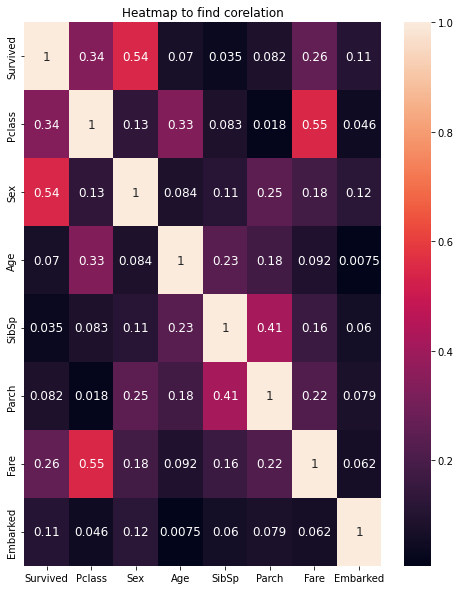

In [40]:
corr=df.corr().abs()
plt.figure(figsize=(8,10))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show
#finding the corelation between and features and label..

In [44]:
X = df.drop(columns = ['Survived'],axis=1)
Y = df[['Survived']]

In [46]:
X
#Splitting dependent and independent variables

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [45]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


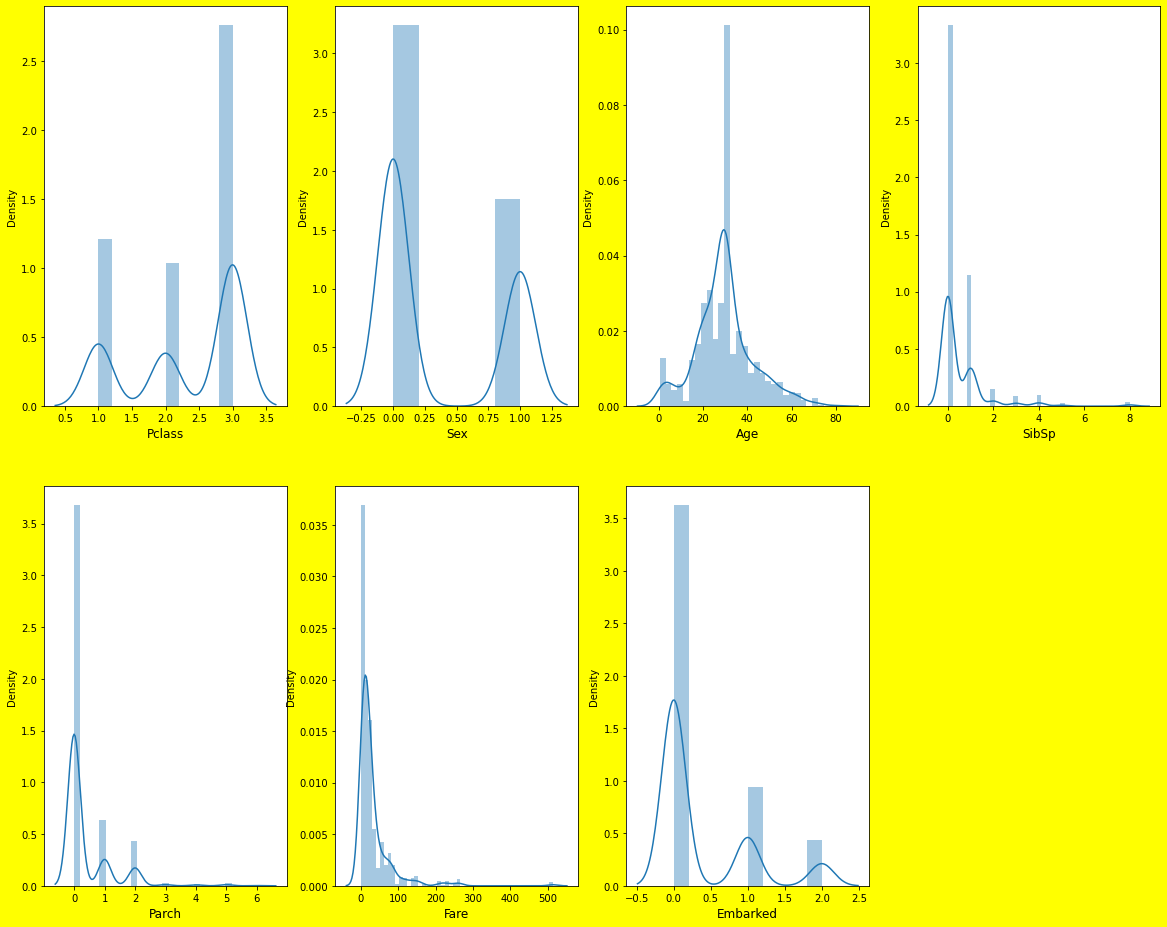

In [52]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in X:
    if plotnumber <= 7:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()    
    

plt.figure(figsize=(15,50),facecolor='yellow')
graph=1
for column in X:
    if graphr <= 7:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(X[column])
        plt.xlabel(column,fontsize=12)
    graph +=1
plt.show()    
    

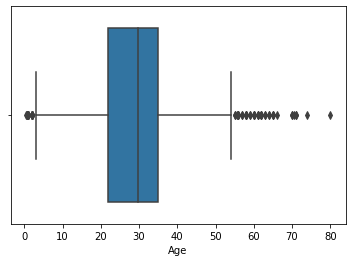

In [68]:
sns.boxplot(data=df,x=X['Age'])
plt.show()   

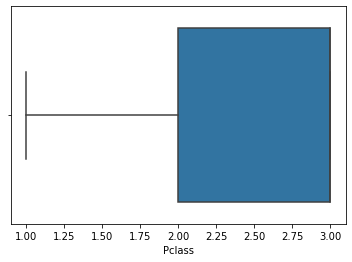

In [69]:
sns.boxplot(data=df,x=X['Pclass'])
plt.show()

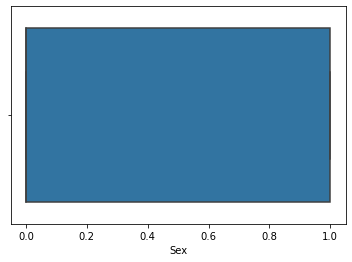

In [70]:
sns.boxplot(data=df,x=X['Sex'])
plt.show()

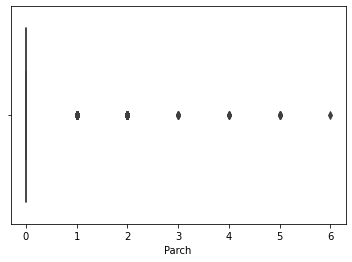

In [71]:
sns.boxplot(data=df,x=X['Parch'])
plt.show()

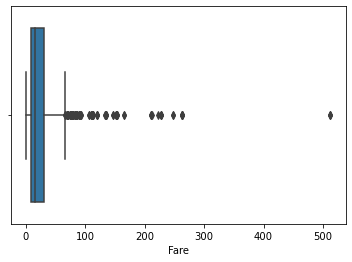

In [72]:
sns.boxplot(data=df,x=X['Fare'])
plt.show()

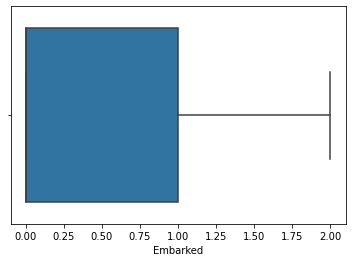

In [73]:
sns.boxplot(data=df,x=X['Embarked'])
plt.show()

In [74]:
q1=data.quantile(0.25)

In [75]:
q3=data.quantile(0.75)

In [78]:
iqr=q3-q1

In [79]:
Pclass_high=(q3.Pclass+(1.5*iqr.Pclass))
Pclass_high

4.5

In [84]:
xyz=np.where(data['Pclass']>Pclass_high)
xyz

(array([], dtype=int64),)

In [88]:
data=data.drop(data.index[xyz])
data.shape

(891, 12)

In [89]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
Age_high=(q3.Age+(1.5*iqr.Age))
Age_high

64.8125

In [93]:
abc=np.where(data['Age']>Age_high)
abc

(array([ 33,  54,  96, 116, 280, 456, 493, 630, 672, 745, 851], dtype=int64),)

In [95]:
data=data.drop(data.index[abc])
print(data.shape)

(880, 12)


In [96]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
876,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
877,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
878,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
SibSp_high=(q3.SibSp+(1.5*iqr.SibSp))
SibSp_high

2.5

In [99]:
abc1=np.where(data['SibSp']>SibSp_high)
abc1

(array([  7,  16,  24,  27,  49,  57,  61,  66,  69,  83,  86, 115, 155,
        160, 167, 172, 176, 178, 197, 225, 229, 257, 262, 274, 319, 336,
        369, 381, 404, 474, 479, 534, 535, 626, 634, 674, 677, 717, 777,
        782, 803, 809, 814, 836, 840, 852], dtype=int64),)

In [101]:
data=data.drop(data.index[abc1])
print(data.shape)

(834, 12)


In [102]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
830,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
831,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
832,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [103]:
Parch_high=(q3.Parch+(1.5*iqr.Parch))
Parch_high

0.0

In [104]:
abc2=np.where(data['Parch']>Parch_high)
abc2

(array([  7,   9,  12,  22,  38,  51,  56,  67,  74,  80,  83,  84,  88,
        103, 108, 112, 120, 124, 129, 131, 132, 137, 139, 143, 147, 148,
        149, 153, 156, 161, 162, 166, 171, 175, 182, 212, 222, 223, 226,
        229, 230, 234, 236, 241, 245, 246, 251, 268, 270, 276, 282, 283,
        285, 289, 290, 294, 298, 299, 302, 310, 317, 321, 325, 329, 331,
        345, 349, 357, 361, 374, 382, 383, 385, 389, 390, 401, 402, 403,
        404, 406, 411, 412, 414, 416, 434, 437, 444, 452, 460, 468, 485,
        491, 492, 494, 495, 497, 501, 502, 508, 509, 510, 518, 527, 540,
        541, 545, 547, 553, 555, 560, 568, 570, 575, 576, 578, 582, 595,
        596, 601, 608, 614, 616, 627, 634, 635, 639, 640, 643, 645, 652,
        656, 663, 674, 689, 695, 698, 702, 703, 706, 707, 715, 726, 731,
        735, 739, 749, 751, 752, 753, 766, 768, 771, 774, 778, 782, 794,
        796, 797, 799, 800, 802, 812, 814, 822, 823, 828, 831], dtype=int64),)

In [105]:
data=data.drop(data.index[abc2])
print(data.shape)

(667, 12)


In [106]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
663,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
664,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
665,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [109]:
Fare_high=(q3.Fare+(1.5*iqr.Fare))
Fare_high

65.6344

In [110]:
abc3=np.where(data['Fare']>Fare_high)
abc3

(array([  1,  23,  25,  41,  47,  48,  54,  90, 106, 114, 140, 157, 160,
        166, 171, 184, 190, 191, 192, 198, 202, 214, 215, 227, 228, 231,
        239, 245, 247, 248, 270, 273, 277, 278, 282, 286, 292, 308, 335,
        361, 362, 370, 377, 378, 392, 398, 403, 406, 416, 444, 458, 471,
        481, 483, 492, 495, 500, 512, 524, 531, 538, 550, 556, 560, 571,
        576, 595, 623, 639], dtype=int64),)

In [111]:
data=data.drop(data.index[abc3])
print(data.shape)

(598, 12)


In [112]:
data.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
4,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
594,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
595,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
596,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


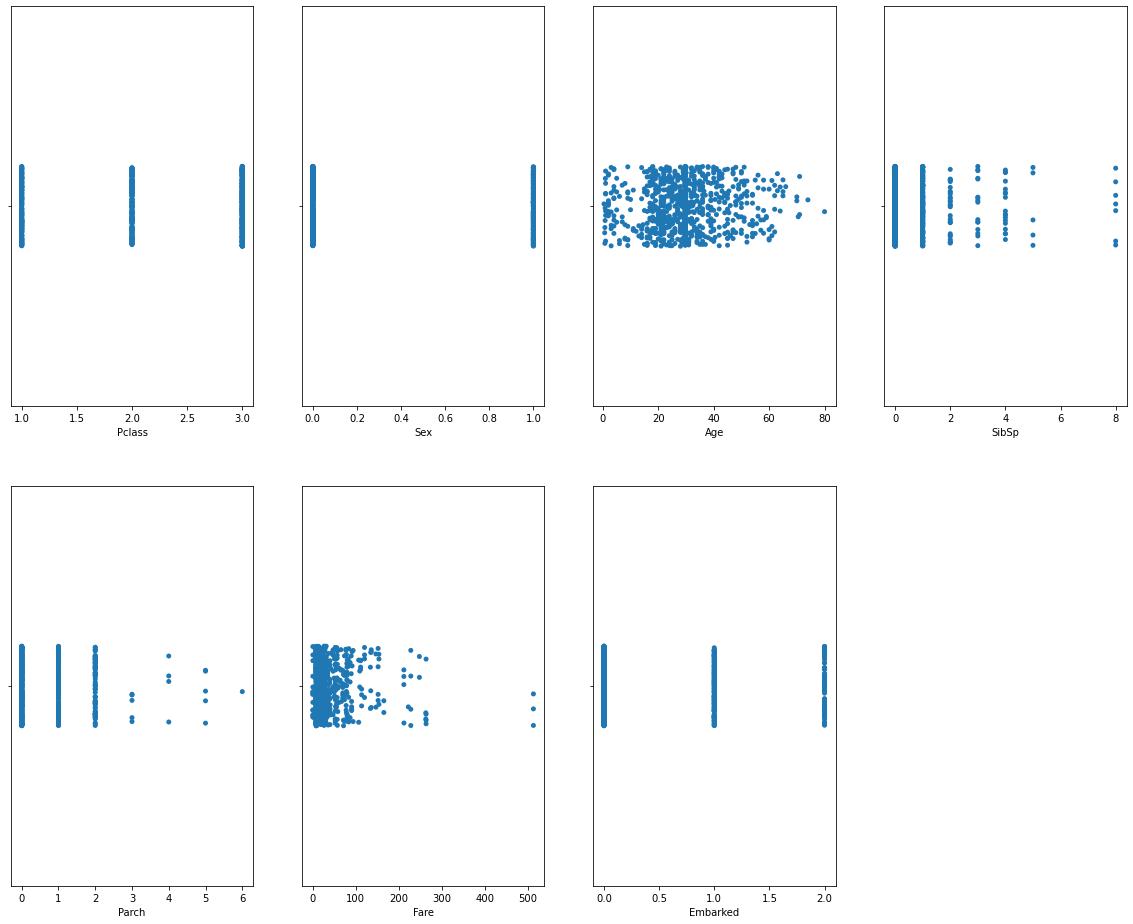

In [115]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in X:
    if plotnumber <= 7:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(X[column])
        
    plotnumber +=1
plt.show()

In [117]:
scalar=StandardScaler()

In [118]:
X_scaled=scalar.fit_transform(X)
X_scaled.shape[1]

7

# Finding vif

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [122]:
vif["features"]=X.columns
vif

,vif,features
0,1.701367,Pclass
1,1.123345,Sex
2,1.205368,Age
3,1.278021,SibSp
4,1.331823,Parch
5,1.620583,Fare
6,1.051295,Embarked


# train and test

In [123]:

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=355)

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [128]:
Y_pred=log_reg.predict(X_test)
Y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [131]:
#ACCURACY Score
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.757847533632287

# confusion matrix

In [132]:
conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat

array([[117,  28],
       [ 26,  52]], dtype=int64)

# classification report

In [133]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       145
           1       0.65      0.67      0.66        78

    accuracy                           0.76       223
   macro avg       0.73      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



In [137]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred) 
print('Threshold=',thresholds) 
print('true Positive Rate=',tpr) 
print('false positive Rate=',fpr)

Threshold= [2 1 0]
true Positive Rate= [0.         0.66666667 1.        ]
false positive Rate= [0.         0.19310345 1.        ]


# roc curve

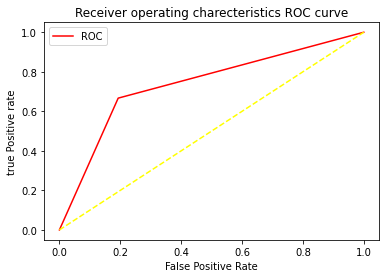

In [135]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')
plt.title('Receiver operating charecteristics ROC curve')
plt.legend()
plt.show()

# AUC Score

In [136]:

auc_score=roc_auc_score(Y_test,Y_pred)
print(auc_score)

0.7367816091954023


# decision tree classifier

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
clf= DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [141]:
clf.score(X_train,Y_train)

0.9865269461077845

In [143]:
Y_pred=clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7219730941704036

In [144]:
grid_para= {
    'criterion':['gini','entropy'],
    'max_depth':range(5,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(2,4)
}

In [146]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [147]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid=grid_para,
                           cv=5,
                          n_jobs=-1)

In [148]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [149]:
best_param=grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [150]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5,min_samples_leaf=8,min_samples_split=4,max_depth=10)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, min_samples_leaf=8,
                       min_samples_split=4)

In [151]:
Y_pred=clf.predict(X_test)

accuracy_score(Y_test,Y_pred)

0.7623318385650224

# knn classifiers

In [152]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [153]:
Y_pred=knn.predict(X_test)

In [154]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[119,  26],
       [ 22,  56]], dtype=int64)

In [155]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       145
           1       0.68      0.72      0.70        78

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.79      0.78      0.79       223



In [165]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LassoCV


In [166]:
k_f=KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [168]:
cross_val_score(knn,X_scaled,Y,cv=10)

array([0.76666667, 0.82022472, 0.71910112, 0.83146067, 0.85393258,
       0.80898876, 0.87640449, 0.79775281, 0.84269663, 0.7752809 ])

In [169]:
cross_val_score(KNeighborsClassifier(),X_scaled,Y,cv=5).mean()

0.8103508882053857

In [ ]:
#So our model is not overfitting..

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
param_grid={'algorithm':['kd_tree','brute'],
           'leaf_size':[3,4,6,7,2,9],
           'n_neighbors':[3,5,7,8,11]
           }

In [172]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [173]:
gridsearch.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 6, 7, 2, 9],
                         'n_neighbors': [3, 5, 7, 8, 11]})

In [174]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [178]:
knn=KNeighborsClassifier(algorithm='brute',leaf_size=5,n_neighbors=3)

In [179]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=5, n_neighbors=3)

In [180]:
Y_pred=knn.predict(X_test)

In [182]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[120,  25],
       [ 23,  55]], dtype=int64)

In [183]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       145
           1       0.69      0.71      0.70        78

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.79      0.78      0.79       223

